In [1]:
# required modules
import xarray as xr
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [ ]:
/home/users/innomask/Hackathon/project02/code


# HISTORICAL CMIP6

In [2]:
# the name sof models whose output is being analysed
models = ['ACCESS-CM2', 'ACCESS-ESM1-5', 'BCC-CSM2-MR', 'CAMS-CSM1-0', 'CanESM5',
          'CNRM-CM6-1', 'CNRM-ESM2-1', 'FGOALS-f3-L', 'FGOALS-g3', 'HadGEM3-GC31-MM',
          'GISS-E2-1-G', 'INM-CM5-0', 'INM-CM4-8',
          'MPI-ESM1-2-LR', 'NorESM2-LM', 'NorESM2-MM', 'TaiESM1', 'UKESM1-0-LL'] 

# we remove the dashes since these shouldnt be included as part of variable names
model_names = ['ACCESS_CM2', 'ACCESS_ESM1_5', 'BCC_CSM2_MR', 'CAMS_CSM1_0', 'CanESM5',
          'CNRM_CM6_1', 'CNRM_ESM2_1', 'FGOALS_f3_L', 'FGOALS_g3', 'HadGEM3_GC31_MM',
          'GISS_E2_1_G', 'INM_CM5_0', 'INM_CM4_8',
          'MPI_ESM1_2_LR', 'NorESM2_LM', 'NorESM2_MM', 'TaiESM1', 'UKESM1_0_LL']

#limits of the data to be plotted
hist_yr_min = 1970
hist_yr_max = 1999

In [3]:
# read in file names
for idx, model in enumerate(models):
    filename = "/gws/pw/j05/cop26_hackathons/bristol/project02/data/CMIP6histo/TRBindices/"+str(model) + \
    "/pr_1m_zonAvgNikulin_"+ str(model) + "_historical_s1850.nc"

    #open file and see attributes
    exec("ds_" + str(model_names[idx]) + "= xr.open_dataset('" + str(filename) + "').sel(time=slice('" + str(hist_yr_min) + "','" +
          str(hist_yr_max) + "'))")
    
    # these are the variable names from the loaded dataset
    print("ds_" + str(model_names[idx]))

ds_ACCESS_CM2
ds_ACCESS_ESM1_5
ds_BCC_CSM2_MR
ds_CAMS_CSM1_0
ds_CanESM5
ds_CNRM_CM6_1
ds_CNRM_ESM2_1
ds_FGOALS_f3_L
ds_FGOALS_g3
ds_HadGEM3_GC31_MM
ds_GISS_E2_1_G
ds_INM_CM5_0
ds_INM_CM4_8
ds_MPI_ESM1_2_LR
ds_NorESM2_LM
ds_NorESM2_MM
ds_TaiESM1
ds_UKESM1_0_LL


In [4]:
# names of all the datastes in a list
all_datasets = [ds_ACCESS_CM2, ds_ACCESS_ESM1_5, ds_BCC_CSM2_MR, 
                ds_CAMS_CSM1_0, ds_CanESM5, ds_CNRM_CM6_1,
                ds_CNRM_ESM2_1, ds_FGOALS_f3_L, ds_FGOALS_g3, 
                ds_HadGEM3_GC31_MM, ds_GISS_E2_1_G, ds_INM_CM5_0, 
                ds_INM_CM4_8, ds_MPI_ESM1_2_LR, ds_NorESM2_LM, 
                ds_NorESM2_MM, ds_TaiESM1, ds_UKESM1_0_LL]

In [5]:
for idx,data_set in enumerate(all_datasets):
    exec("trb_locations_" + str(model_names[idx]) + "= data_set.gaussian_params.sel(popt='mean')")
    exec("trb_intensity_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='amplitude')")
    exec("trb_width_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='width')")

    # JAS data
    # select subseasons (July - September i.e JAS)
    exec("JAS_trb_locations_" + str(model_names[idx]) + " = trb_locations_" + str(model_names[idx]) + 
          ".where(trb_locations_" + str(model_names[idx]) + ".time.dt.month.isin([7, 8,9]), drop=True)")
    exec("JAS_trb_intensity_" + str(model_names[idx]) + " = trb_intensity_" + str(model_names[idx]) + 
          ".where(trb_intensity_" + str(model_names[idx]) + ".time.dt.month.isin([7, 8,9]), drop=True)")
    exec("JAS_trb_width_" + str(model_names[idx]) + " = trb_width_" + str(model_names[idx]) + 
          ".where(trb_width_" + str(model_names[idx]) + ".time.dt.month.isin([7, 8,9]), drop=True)")
    
    # DJF data
    # select subseasons (December - February i.e. DJF)
    exec("DJF_trb_locations_" + str(model_names[idx]) + "_raw = trb_locations_" + str(model_names[idx]) + 
          ".where(trb_locations_" + str(model_names[idx]) + ".time.dt.month.isin([12, 1, 2]))")
    exec("DJF_trb_intensity_" + str(model_names[idx]) + "_raw = trb_intensity_" + str(model_names[idx]) + 
          ".where(trb_intensity_" + str(model_names[idx]) + ".time.dt.month.isin([12, 1, 2]))")
    exec("DJF_trb_width_" + str(model_names[idx]) + "_raw = trb_width_" + str(model_names[idx]) + 
          ".where(trb_width_" + str(model_names[idx]) + ".time.dt.month.isin([12, 1, 2]))")
    
    # ignore JF of the first year and D of the last year
    exec("DJF_trb_locations_" + str(model_names[idx]) + " = DJF_trb_locations_" + str(model_names[idx]) + 
          "_raw.sel(time=slice('" + str(hist_yr_min) + "-10', '" + str(hist_yr_max) + "-01'))")
    exec("DJF_trb_intensity_" + str(model_names[idx]) + " = DJF_trb_intensity_" + str(model_names[idx]) + 
          "_raw.sel(time=slice('" + str(hist_yr_min) + "-10', '" + str(hist_yr_max) + "-01'))")
    exec("DJF_trb_width_" + str(model_names[idx]) + " = DJF_trb_width_" + str(model_names[idx]) + 
          "_raw.sel(time=slice('" + str(hist_yr_min) + "-10', '" + str(hist_yr_max) + "-01'))")
    
    exec("trb_locations_" + str(model_names[idx]) + "= data_set.gaussian_params.sel(popt='mean')")
    exec("trb_intensity_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='amplitude')")
    exec("trb_width_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='width')")
    
    # The remaining months
    # select subseasons (July - September i.e JAS)
    exec("mnths_trb_locations_" + str(model_names[idx]) + " = trb_locations_" + str(model_names[idx]) + 
         ".where(trb_locations_" + str(model_names[idx]) + ".time.dt.month.isin([3,4,5,6,10]), drop=True)")
    exec("mnths_trb_intensity_" + str(model_names[idx]) + " = trb_intensity_" + str(model_names[idx]) + 
         ".where(trb_intensity_" + str(model_names[idx]) + ".time.dt.month.isin([3,4,5,6,10]), drop=True)")
    exec("mnths_trb_width_" + str(model_names[idx]) + " = trb_width_" + str(model_names[idx]) + 
         ".where(trb_width_" + str(model_names[idx]) + ".time.dt.month.isin([3,4,5,6,10]), drop=True)")

# PLOTS

In [6]:
# Dir t store output
output_dir = "/home/users/innomask/Hackathon/project02/results/"

## TRB indice - intensity/location 

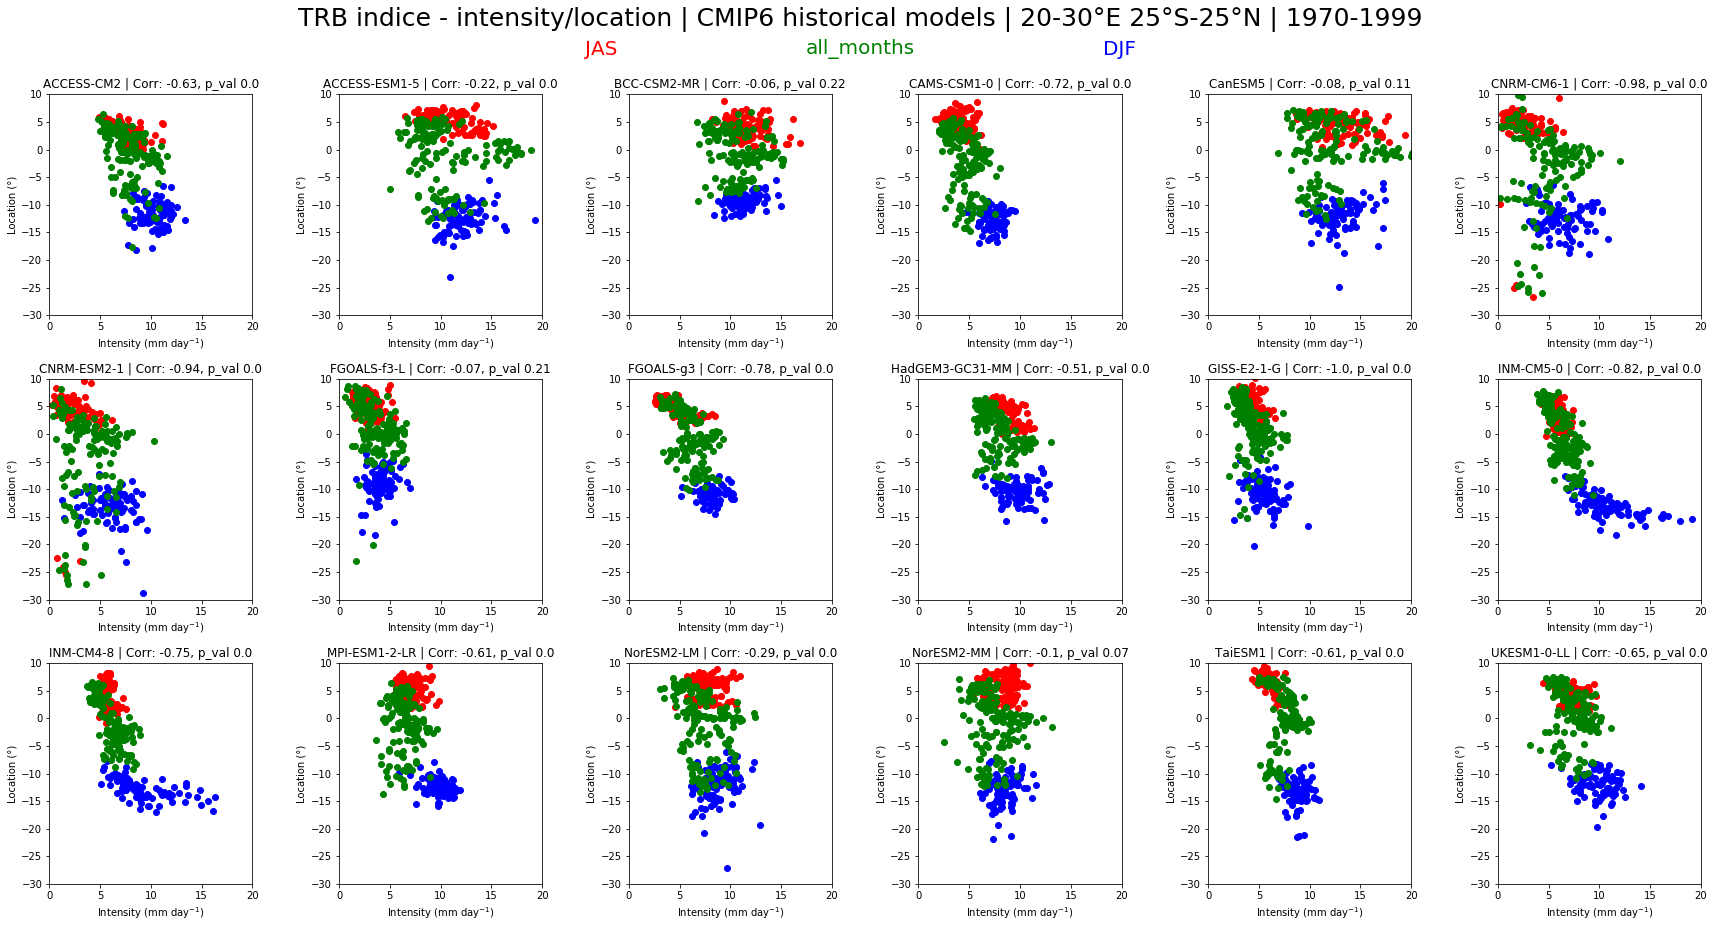

In [7]:
fig = plt.figure(figsize=(24,12))
nrows = 3
ncolumns = 6

for i in range(nrows*ncolumns):
    # Create axes
    exec("ax" + str(i+1) + " = fig.add_subplot(" + str(nrows) + ","+ str(ncolumns) + "," + str(i+1) + ")")
    
    #Plot data
    exec("ax" + str(i+1) + ".scatter(DJF_trb_intensity_" + str(model_names[i]) + ", " +
          "DJF_trb_locations_" + str(model_names[i]) + ",color='b'" +")")    
    exec("ax" + str(i+1) + ".scatter(JAS_trb_intensity_" + str(model_names[i]) + ", " +
          "JAS_trb_locations_" + str(model_names[i]) + ",color='r'" +")")        
    exec("ax" + str(i+1) + ".scatter(mnths_trb_intensity_" + str(model_names[i]) + ", " +
          "mnths_trb_locations_" + str(model_names[i]) + ",color='g'" +")")
    
    # Subtitles: Model name and statics
    #remove nans FIRST before computing the statistics
    exec("mask = ~np.isnan(trb_intensity_" + str(model_names[i]) + ") & ~np.isnan(trb_locations_" + str(model_names[i])+ ")")
    exec("ax" + str(i+1) + ".title.set_text('" + str(models[i]) + " | Corr: " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_locations_" + str(model_names[i]) + "[mask])[2], 2)")) +
         ", p_val " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_locations_" + str(model_names[i]) + "[mask])[3], 2)")) +        
         "')")

    # Axis lables
    exec("ax" + str(i+1) + ".set_xlabel('Intensity (mm day$^{-1}$)')") 
    exec("ax" + str(i+1) + ".set_ylabel('Location (°)')")
    
    # Axis limits
    exec("ax" + str(i+1) + ".set_xlim(0, 20)")
    exec("ax" + str(i+1) + ".set_ylim(-30, 10)")


plt.figtext(0.35, 1.01, "JAS", ha="center", va="bottom", fontsize =20, color="red")
plt.figtext(0.5, 1.01, "all_months", ha="center", va="bottom", fontsize =20,color="green")
plt.figtext(0.65,1.01,"DJF", ha="center", va="bottom", fontsize =20,color="blue")

# adjusts subplot spacing perfectly
plt.tight_layout()

# Figure titles
title = 'TRB indice - intensity/location | ' + 'CMIP6 historical models' + ' | 20-30°E 25°S-25°N | ' + str(hist_yr_min) + '-' + str(hist_yr_max)
plt.suptitle(title, y=1.07, fontsize =25)

#Save fig
plt.savefig('{}/historical_1970_1999_TRB_intensity_location.png'.format(output_dir), dpi=300, bbox_inches='tight')

plt.show()

## TRB indice - intensity/width

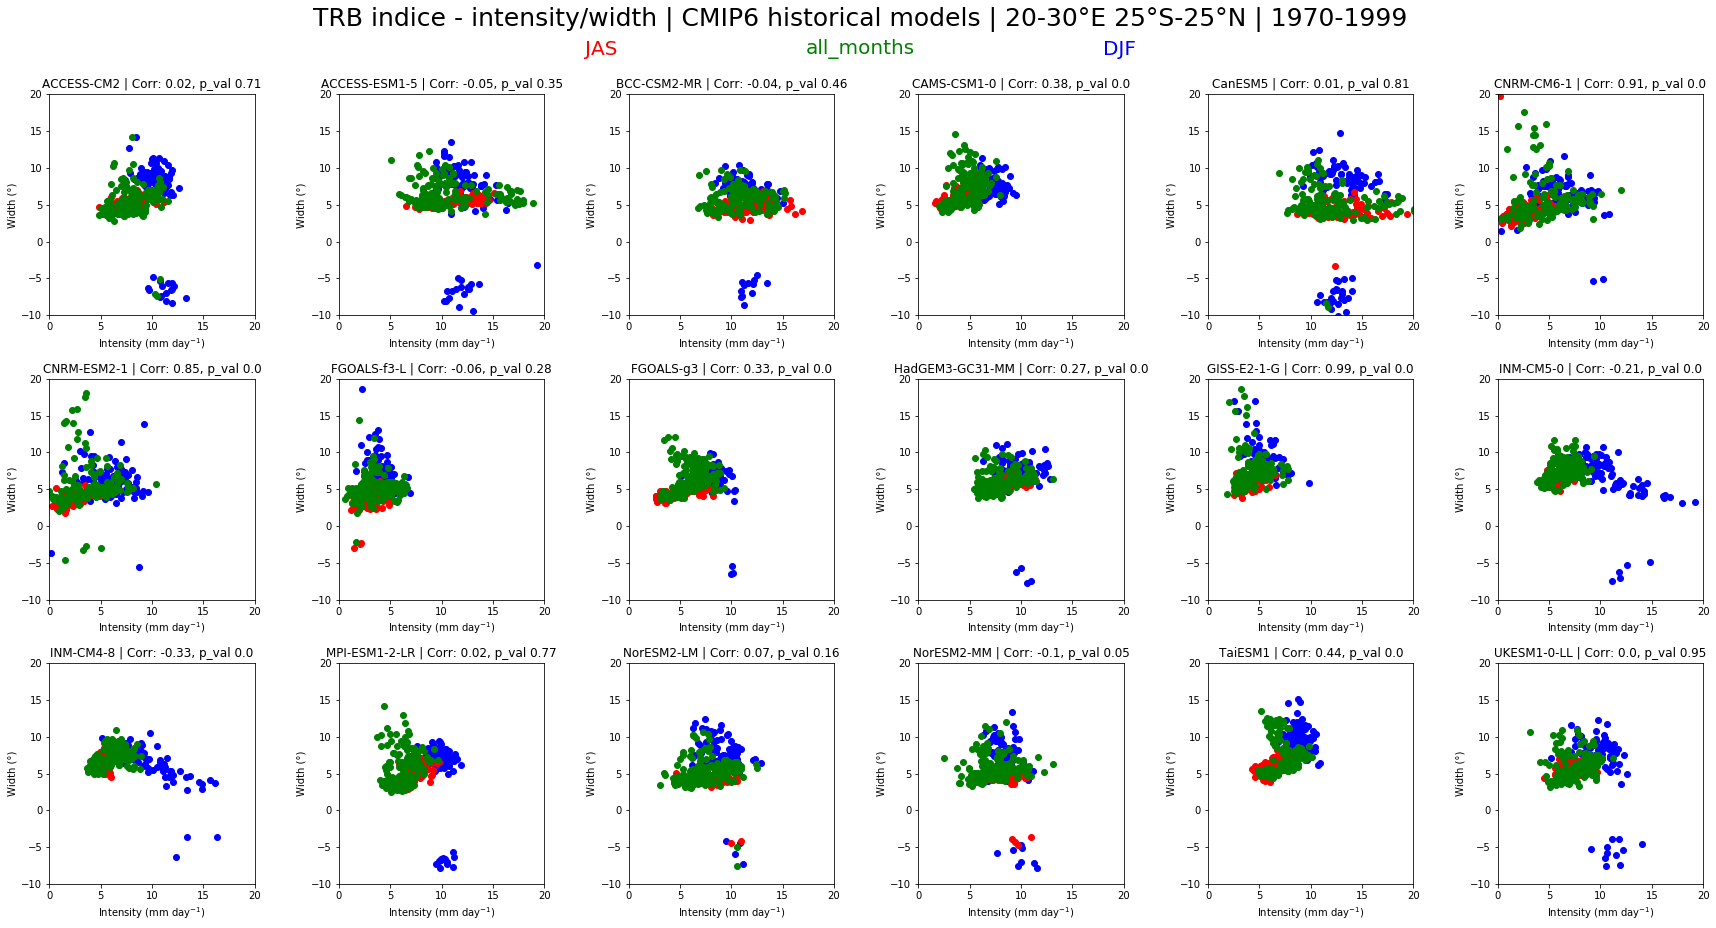

In [8]:
fig = plt.figure(figsize=(24,12))
nrows = 3
ncolumns = 6

for i in range(nrows*ncolumns):
    # Create axes
    exec("ax" + str(i+1) + " = fig.add_subplot(" + str(nrows) + ","+ str(ncolumns) + "," + str(i+1) + ")")
    
    #Plot data
    exec("ax" + str(i+1) + ".scatter(DJF_trb_intensity_" + str(model_names[i]) + ", " +
          "DJF_trb_width_" + str(model_names[i]) + ",color='b'" +")")    
    exec("ax" + str(i+1) + ".scatter(JAS_trb_intensity_" + str(model_names[i]) + ", " +
          "JAS_trb_width_" + str(model_names[i]) + ",color='r'" +")")        
    exec("ax" + str(i+1) + ".scatter(mnths_trb_intensity_" + str(model_names[i]) + ", " +
          "mnths_trb_width_" + str(model_names[i]) + ",color='g'" +")")
    
    # Subtitles: Model name and statics
    #remove nans FIRST before computing the statistics
    exec("mask = ~np.isnan(trb_intensity_" + str(model_names[i]) + 
         ") & ~np.isnan(trb_width_" + str(model_names[i])+ ")")
    
    exec("ax" + str(i+1) + ".title.set_text('" + str(models[i]) + " | Corr: " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[2], 2)")) + ", p_val " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[3], 2)")) + "')")

    # Axis lables
    exec("ax" + str(i+1) + ".set_xlabel('Intensity (mm day$^{-1}$)')") 
    exec("ax" + str(i+1) + ".set_ylabel('Width (°)')")
    
    # Axis limits
    exec("ax" + str(i+1) + ".set_xlim(0, 20)")
    exec("ax" + str(i+1) + ".set_ylim(-10, 20)")


plt.figtext(0.35, 1.01, "JAS", ha="center", va="bottom", fontsize =20, color="red")
plt.figtext(0.5, 1.01, "all_months", ha="center", va="bottom", fontsize =20,color="green")
plt.figtext(0.65,1.01,"DJF", ha="center", va="bottom", fontsize =20,color="blue")

# adjusts subplot spacing perfectly
plt.tight_layout()

# Figure titles
title = 'TRB indice - intensity/width | ' + 'CMIP6 historical models' + ' | 20-30°E 25°S-25°N | ' + str(hist_yr_min) + '-' + str(hist_yr_max)
plt.suptitle(title, y=1.07, fontsize =25)

#Save fig
plt.savefig('{}/historical_1970_1999_TRB_intensity_width.png'.format(output_dir), dpi=300, bbox_inches='tight')

plt.show()

## TRB indice - locations/width

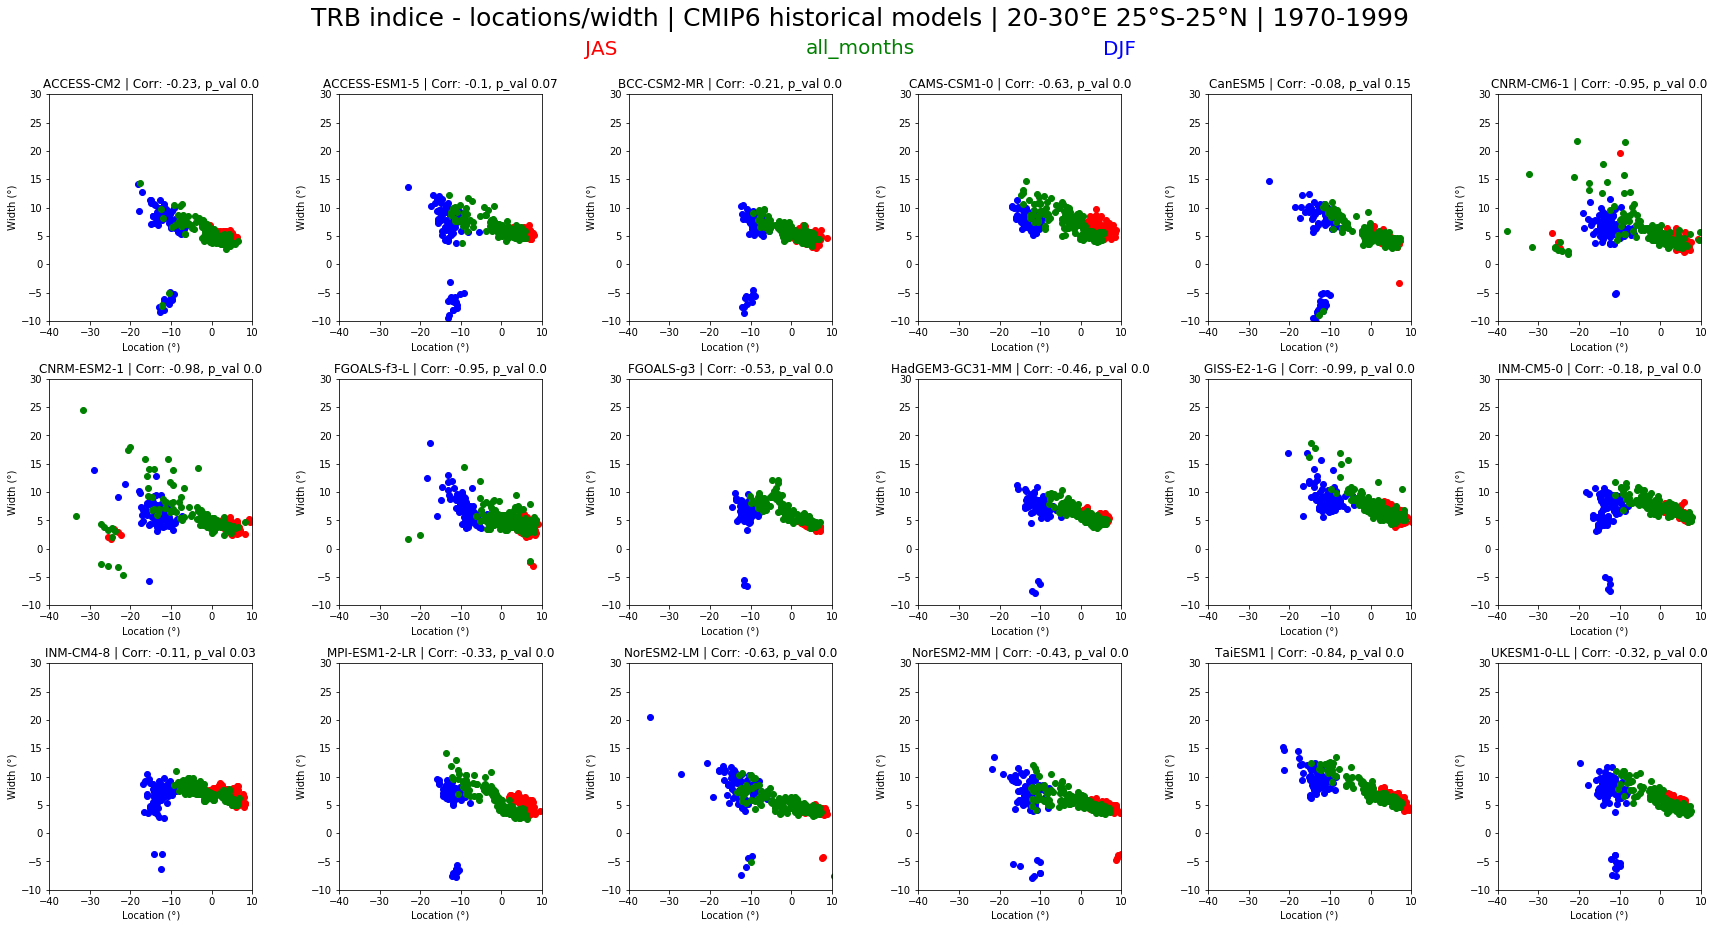

In [9]:
fig = plt.figure(figsize=(24,12))
nrows = 3
ncolumns = 6

for i in range(nrows*ncolumns):
    # Create axes
    exec("ax" + str(i+1) + " = fig.add_subplot(" + str(nrows) + ","+ str(ncolumns) + "," + str(i+1) + ")")
    
    #Plot data
    exec("ax" + str(i+1) + ".scatter(DJF_trb_locations_" + str(model_names[i]) + ", " +
          "DJF_trb_width_" + str(model_names[i]) + ",color='b'" +")")    
    exec("ax" + str(i+1) + ".scatter(JAS_trb_locations_" + str(model_names[i]) + ", " +
          "JAS_trb_width_" + str(model_names[i]) + ",color='r'" +")")        
    exec("ax" + str(i+1) + ".scatter(mnths_trb_locations_" + str(model_names[i]) + ", " +
          "mnths_trb_width_" + str(model_names[i]) + ",color='g'" +")")
    
    # Subtitles: Model name and statics
    #remove nans FIRST before computing the statistics
    exec("mask = ~np.isnan(trb_locations_" + str(model_names[i]) + 
         ") & ~np.isnan(trb_width_" + str(model_names[i])+ ")")
    
    exec("ax" + str(i+1) + ".title.set_text('" + str(models[i]) + " | Corr: " + 
         str(eval("round(linregress(trb_locations_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[2], 2)")) + ", p_val " + 
         str(eval("round(linregress(trb_locations_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[3], 2)")) + "')")

    # Axis lables
    exec("ax" + str(i+1) + ".set_xlabel('Location (°)')")
    exec("ax" + str(i+1) + ".set_ylabel('Width (°)')")
    
    # Axis limits
    exec("ax" + str(i+1) + ".set_xlim(-40, 10)")
    exec("ax" + str(i+1) + ".set_ylim(-10, 30)")


plt.figtext(0.35, 1.01, "JAS", ha="center", va="bottom", fontsize =20, color="red")
plt.figtext(0.5, 1.01, "all_months", ha="center", va="bottom", fontsize =20,color="green")
plt.figtext(0.65,1.01,"DJF", ha="center", va="bottom", fontsize =20,color="blue")

# adjusts subplot spacing perfectly
plt.tight_layout()

# Figure titles
title = 'TRB indice - locations/width | ' + 'CMIP6 historical models' + ' | 20-30°E 25°S-25°N | ' + str(hist_yr_min) + '-' + str(hist_yr_max)
plt.suptitle(title, y=1.07, fontsize =25)

#Save fig
plt.savefig('{}/historical_1970_1999_TRB_locations_width.png'.format(output_dir), dpi=300, bbox_inches='tight')

plt.show()

# PROJECTIONS CMIP6

In [10]:
# for the same models we examine the TRB indices in the future
#limits of the data to be plotted
proj_yr_min = 2070
proj_yr_max = 2099

In [11]:
# read in file names
for idx, model in enumerate(models):
    filename = "/gws/pw/j05/cop26_hackathons/bristol/project02/data/CMIP6proj/TRBindices/"+str(model) + \
    "/pr_1m_zon_Avg_Nikulin_"+ str(model) + "_ssp585_s2015.nc"

    #open file and see attributes
    exec("ds_" + str(model_names[idx]) + "= xr.open_dataset('" + str(filename) + "').sel(time=slice('" + str(proj_yr_min) + "','" +
          str(proj_yr_max) + "'))")
    
    # these are the variable names from the loaded dataset
    print("ds_" + str(model_names[idx]))

ds_ACCESS_CM2
ds_ACCESS_ESM1_5
ds_BCC_CSM2_MR
ds_CAMS_CSM1_0
ds_CanESM5
ds_CNRM_CM6_1
ds_CNRM_ESM2_1
ds_FGOALS_f3_L
ds_FGOALS_g3
ds_HadGEM3_GC31_MM
ds_GISS_E2_1_G
ds_INM_CM5_0
ds_INM_CM4_8
ds_MPI_ESM1_2_LR
ds_NorESM2_LM
ds_NorESM2_MM
ds_TaiESM1
ds_UKESM1_0_LL


In [12]:
# names of all the datastes in a list
all_datasets = [ds_ACCESS_CM2, ds_ACCESS_ESM1_5, ds_BCC_CSM2_MR, 
                ds_CAMS_CSM1_0, ds_CanESM5, ds_CNRM_CM6_1,
                ds_CNRM_ESM2_1, ds_FGOALS_f3_L, ds_FGOALS_g3, 
                ds_HadGEM3_GC31_MM, ds_GISS_E2_1_G, ds_INM_CM5_0, 
                ds_INM_CM4_8, ds_MPI_ESM1_2_LR, ds_NorESM2_LM, 
                ds_NorESM2_MM, ds_TaiESM1, ds_UKESM1_0_LL]

In [13]:
for idx,data_set in enumerate(all_datasets):
    exec("trb_locations_" + str(model_names[idx]) + "= data_set.gaussian_params.sel(popt='mean')")
    exec("trb_intensity_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='amplitude')")
    exec("trb_width_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='width')")

    # JAS data
    # select subseasons (July - September i.e JAS)
    exec("JAS_trb_locations_" + str(model_names[idx]) + " = trb_locations_" + str(model_names[idx]) + 
          ".where(trb_locations_" + str(model_names[idx]) + ".time.dt.month.isin([7, 8,9]), drop=True)")
    exec("JAS_trb_intensity_" + str(model_names[idx]) + " = trb_intensity_" + str(model_names[idx]) + 
          ".where(trb_intensity_" + str(model_names[idx]) + ".time.dt.month.isin([7, 8,9]), drop=True)")
    exec("JAS_trb_width_" + str(model_names[idx]) + " = trb_width_" + str(model_names[idx]) + 
          ".where(trb_width_" + str(model_names[idx]) + ".time.dt.month.isin([7, 8,9]), drop=True)")
    
    # DJF data
    # select subseasons (December - February i.e. DJF)
    exec("DJF_trb_locations_" + str(model_names[idx]) + "_raw = trb_locations_" + str(model_names[idx]) + 
          ".where(trb_locations_" + str(model_names[idx]) + ".time.dt.month.isin([12, 1, 2]))")
    exec("DJF_trb_intensity_" + str(model_names[idx]) + "_raw = trb_intensity_" + str(model_names[idx]) + 
          ".where(trb_intensity_" + str(model_names[idx]) + ".time.dt.month.isin([12, 1, 2]))")
    exec("DJF_trb_width_" + str(model_names[idx]) + "_raw = trb_width_" + str(model_names[idx]) + 
          ".where(trb_width_" + str(model_names[idx]) + ".time.dt.month.isin([12, 1, 2]))")
    
    # ignore JF of the first year and D of the last year
    exec("DJF_trb_locations_" + str(model_names[idx]) + " = DJF_trb_locations_" + str(model_names[idx]) + 
          "_raw.sel(time=slice('" + str(proj_yr_min) + "-10', '" + str(proj_yr_max) + "-01'))")
    exec("DJF_trb_intensity_" + str(model_names[idx]) + " = DJF_trb_intensity_" + str(model_names[idx]) + 
          "_raw.sel(time=slice('" + str(proj_yr_min) + "-10', '" + str(proj_yr_max) + "-01'))")
    exec("DJF_trb_width_" + str(model_names[idx]) + " = DJF_trb_width_" + str(model_names[idx]) + 
          "_raw.sel(time=slice('" + str(proj_yr_min) + "-10', '" + str(proj_yr_max) + "-01'))")
    
    exec("trb_locations_" + str(model_names[idx]) + "= data_set.gaussian_params.sel(popt='mean')")
    exec("trb_intensity_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='amplitude')")
    exec("trb_width_" + str(model_names[idx]) + " = data_set.gaussian_params.sel(popt='width')")
    
    # The remaining months
    # select subseasons (July - September i.e JAS)
    exec("mnths_trb_locations_" + str(model_names[idx]) + " = trb_locations_" + str(model_names[idx]) + 
         ".where(trb_locations_" + str(model_names[idx]) + ".time.dt.month.isin([3,4,5,6,10]), drop=True)")
    exec("mnths_trb_intensity_" + str(model_names[idx]) + " = trb_intensity_" + str(model_names[idx]) + 
         ".where(trb_intensity_" + str(model_names[idx]) + ".time.dt.month.isin([3,4,5,6,10]), drop=True)")
    exec("mnths_trb_width_" + str(model_names[idx]) + " = trb_width_" + str(model_names[idx]) + 
         ".where(trb_width_" + str(model_names[idx]) + ".time.dt.month.isin([3,4,5,6,10]), drop=True)")

## TRB indice - intensity/location 

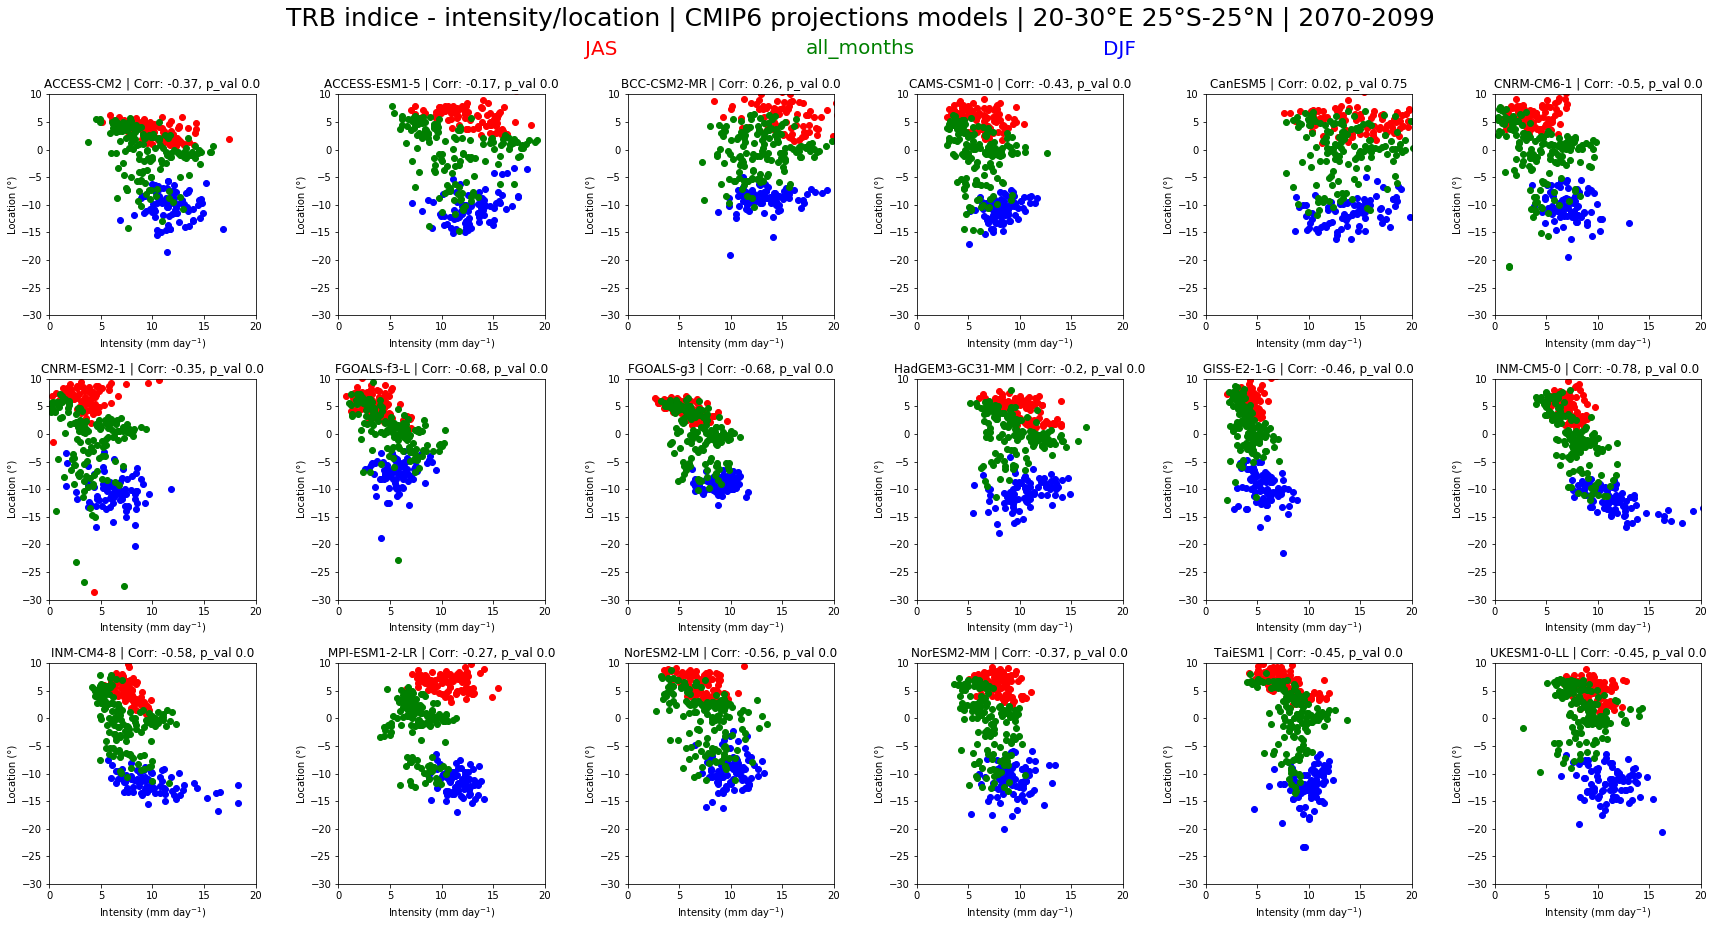

In [14]:
fig = plt.figure(figsize=(24,12))
nrows = 3
ncolumns = 6

for i in range(nrows*ncolumns):
    # Create axes
    exec("ax" + str(i+1) + " = fig.add_subplot(" + str(nrows) + ","+ str(ncolumns) + "," + str(i+1) + ")")
    
    #Plot data
    exec("ax" + str(i+1) + ".scatter(DJF_trb_intensity_" + str(model_names[i]) + ", " +
          "DJF_trb_locations_" + str(model_names[i]) + ",color='b'" +")")    
    exec("ax" + str(i+1) + ".scatter(JAS_trb_intensity_" + str(model_names[i]) + ", " +
          "JAS_trb_locations_" + str(model_names[i]) + ",color='r'" +")")        
    exec("ax" + str(i+1) + ".scatter(mnths_trb_intensity_" + str(model_names[i]) + ", " +
          "mnths_trb_locations_" + str(model_names[i]) + ",color='g'" +")")
    
    # Subtitles: Model name and statics
    #remove nans FIRST before computing the statistics
    exec("mask = ~np.isnan(trb_intensity_" + str(model_names[i]) + ") & ~np.isnan(trb_locations_" + str(model_names[i])+ ")")
    exec("ax" + str(i+1) + ".title.set_text('" + str(models[i]) + " | Corr: " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_locations_" + str(model_names[i]) + "[mask])[2], 2)")) +
         ", p_val " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_locations_" + str(model_names[i]) + "[mask])[3], 2)")) +        
         "')")

    # Axis lables
    exec("ax" + str(i+1) + ".set_xlabel('Intensity (mm day$^{-1}$)')") 
    exec("ax" + str(i+1) + ".set_ylabel('Location (°)')")
    
    # Axis limits
    exec("ax" + str(i+1) + ".set_xlim(0, 20)")
    exec("ax" + str(i+1) + ".set_ylim(-30, 10)")


plt.figtext(0.35, 1.01, "JAS", ha="center", va="bottom", fontsize =20, color="red")
plt.figtext(0.5, 1.01, "all_months", ha="center", va="bottom", fontsize =20,color="green")
plt.figtext(0.65,1.01,"DJF", ha="center", va="bottom", fontsize =20,color="blue")

# adjusts subplot spacing perfectly
plt.tight_layout()

# Figure titles
title = 'TRB indice - intensity/location | ' + 'CMIP6 projections models' + ' | 20-30°E 25°S-25°N | ' + str(proj_yr_min) + '-' + str(proj_yr_max)
plt.suptitle(title, y=1.07, fontsize =25)

#Save fig
plt.savefig('{}/projections_2070_2099_TRB_intensity_location.png'.format(output_dir), dpi=300, bbox_inches='tight')

plt.show()

## TRB indice - intensity/width

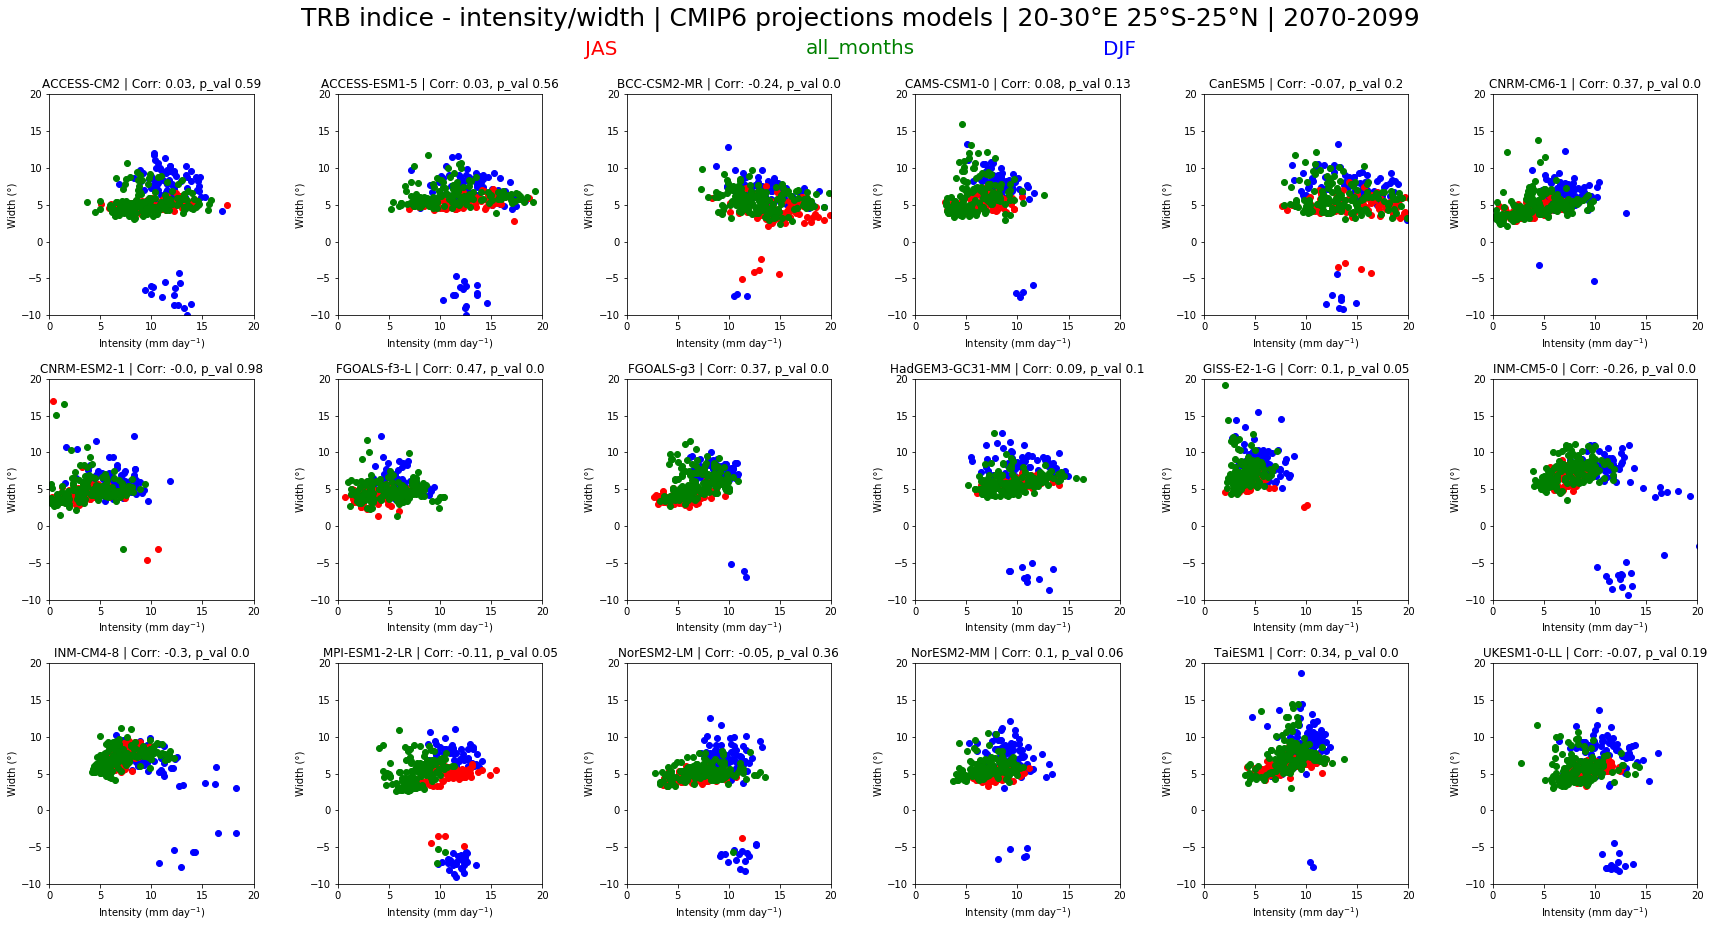

In [15]:
fig = plt.figure(figsize=(24,12))
nrows = 3
ncolumns = 6

for i in range(nrows*ncolumns):
    # Create axes
    exec("ax" + str(i+1) + " = fig.add_subplot(" + str(nrows) + ","+ str(ncolumns) + "," + str(i+1) + ")")
    
    #Plot data
    exec("ax" + str(i+1) + ".scatter(DJF_trb_intensity_" + str(model_names[i]) + ", " +
          "DJF_trb_width_" + str(model_names[i]) + ",color='b'" +")")    
    exec("ax" + str(i+1) + ".scatter(JAS_trb_intensity_" + str(model_names[i]) + ", " +
          "JAS_trb_width_" + str(model_names[i]) + ",color='r'" +")")        
    exec("ax" + str(i+1) + ".scatter(mnths_trb_intensity_" + str(model_names[i]) + ", " +
          "mnths_trb_width_" + str(model_names[i]) + ",color='g'" +")")
    
    # Subtitles: Model name and statics
    #remove nans FIRST before computing the statistics
    exec("mask = ~np.isnan(trb_intensity_" + str(model_names[i]) + 
         ") & ~np.isnan(trb_width_" + str(model_names[i])+ ")")
    
    exec("ax" + str(i+1) + ".title.set_text('" + str(models[i]) + " | Corr: " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[2], 2)")) + ", p_val " + 
         str(eval("round(linregress(trb_intensity_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[3], 2)")) + "')")

    # Axis lables
    exec("ax" + str(i+1) + ".set_xlabel('Intensity (mm day$^{-1}$)')") 
    exec("ax" + str(i+1) + ".set_ylabel('Width (°)')")
    
    # Axis limits
    exec("ax" + str(i+1) + ".set_xlim(0, 20)")
    exec("ax" + str(i+1) + ".set_ylim(-10, 20)")


plt.figtext(0.35, 1.01, "JAS", ha="center", va="bottom", fontsize =20, color="red")
plt.figtext(0.5, 1.01, "all_months", ha="center", va="bottom", fontsize =20,color="green")
plt.figtext(0.65,1.01,"DJF", ha="center", va="bottom", fontsize =20,color="blue")

# adjusts subplot spacing perfectly
plt.tight_layout()

# Figure titles
title = 'TRB indice - intensity/width | ' + 'CMIP6 projections models' + ' | 20-30°E 25°S-25°N | ' + str(proj_yr_min) + '-' + str(proj_yr_max)
plt.suptitle(title, y=1.07, fontsize =25)

#Save fig
plt.savefig('{}/projections_2070_2099_TRB_intensity_width.png'.format(output_dir), dpi=300, bbox_inches='tight')

plt.show()

## TRB indice - locations/width

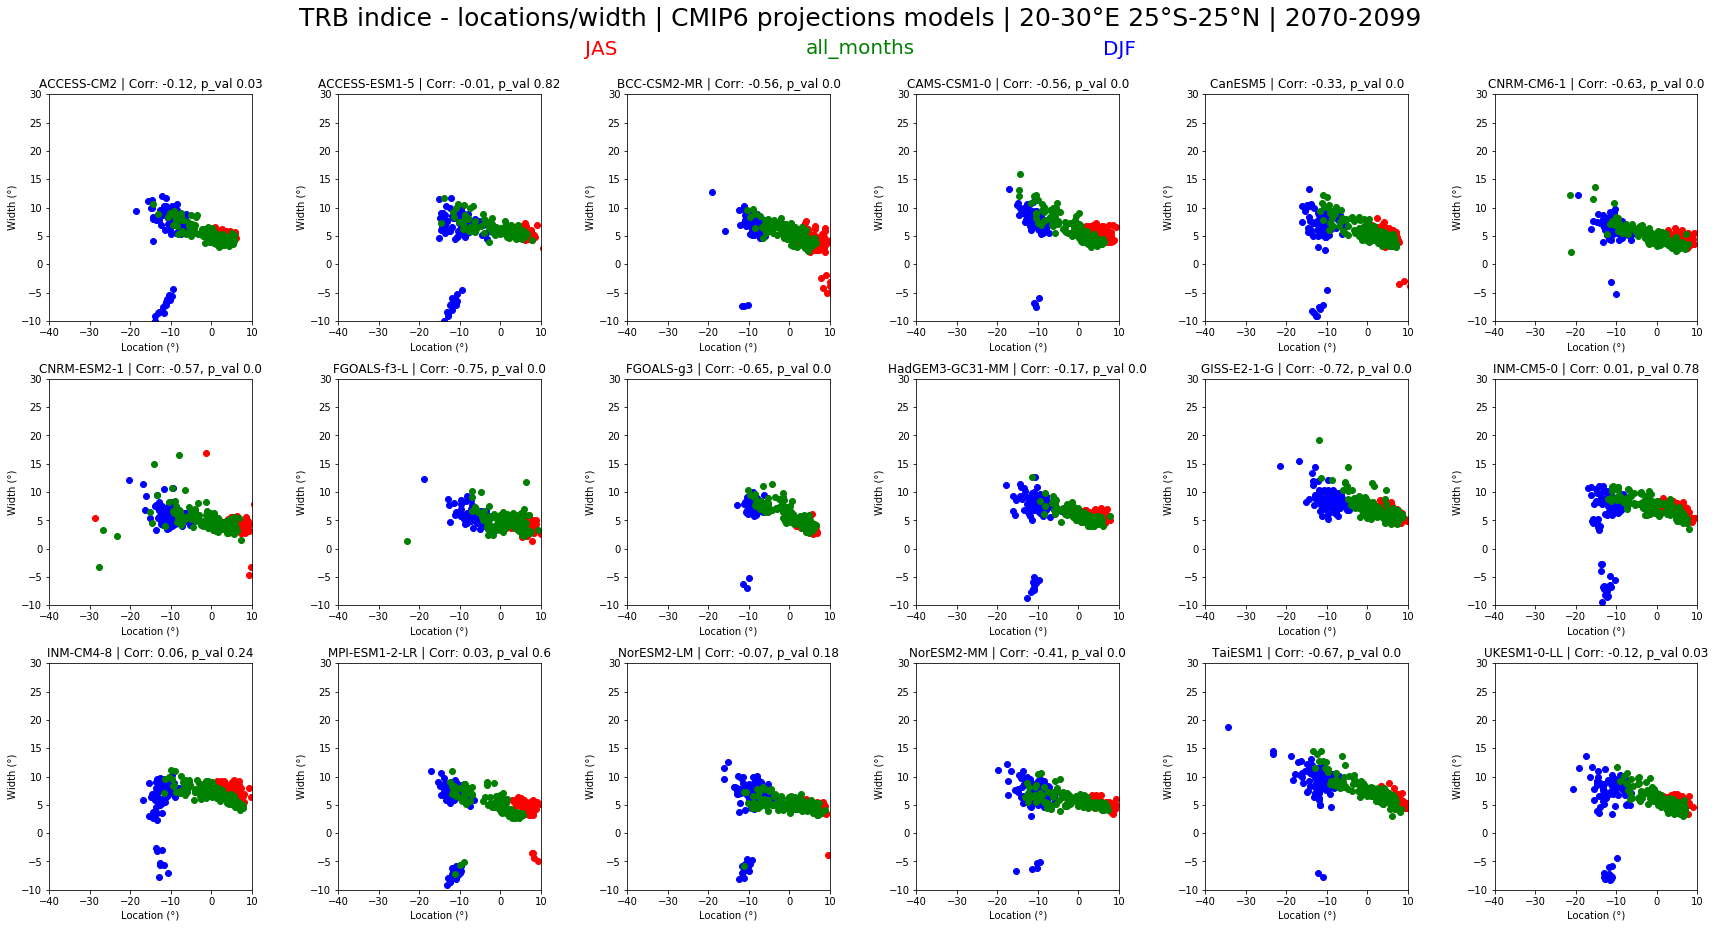

In [16]:
fig = plt.figure(figsize=(24,12))
nrows = 3
ncolumns = 6

for i in range(nrows*ncolumns):
    # Create axes
    exec("ax" + str(i+1) + " = fig.add_subplot(" + str(nrows) + ","+ str(ncolumns) + "," + str(i+1) + ")")
    
    #Plot data
    exec("ax" + str(i+1) + ".scatter(DJF_trb_locations_" + str(model_names[i]) + ", " +
          "DJF_trb_width_" + str(model_names[i]) + ",color='b'" +")")    
    exec("ax" + str(i+1) + ".scatter(JAS_trb_locations_" + str(model_names[i]) + ", " +
          "JAS_trb_width_" + str(model_names[i]) + ",color='r'" +")")        
    exec("ax" + str(i+1) + ".scatter(mnths_trb_locations_" + str(model_names[i]) + ", " +
          "mnths_trb_width_" + str(model_names[i]) + ",color='g'" +")")
    
    # Subtitles: Model name and statics
    #remove nans FIRST before computing the statistics
    exec("mask = ~np.isnan(trb_locations_" + str(model_names[i]) + 
         ") & ~np.isnan(trb_width_" + str(model_names[i])+ ")")
    
    exec("ax" + str(i+1) + ".title.set_text('" + str(models[i]) + " | Corr: " + 
         str(eval("round(linregress(trb_locations_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[2], 2)")) + ", p_val " + 
         str(eval("round(linregress(trb_locations_" + str(model_names[i]) + 
                  "[mask], trb_width_" + str(model_names[i]) + "[mask])[3], 2)")) + "')")

    # Axis lables
    exec("ax" + str(i+1) + ".set_xlabel('Location (°)')")
    exec("ax" + str(i+1) + ".set_ylabel('Width (°)')")
    
    # Axis limits
    exec("ax" + str(i+1) + ".set_xlim(-40, 10)")
    exec("ax" + str(i+1) + ".set_ylim(-10, 30)")


plt.figtext(0.35, 1.01, "JAS", ha="center", va="bottom", fontsize =20, color="red")
plt.figtext(0.5, 1.01, "all_months", ha="center", va="bottom", fontsize =20,color="green")
plt.figtext(0.65,1.01,"DJF", ha="center", va="bottom", fontsize =20,color="blue")

# adjusts subplot spacing perfectly
plt.tight_layout()

# Figure titles
title = 'TRB indice - locations/width | ' + 'CMIP6 projections models' + ' | 20-30°E 25°S-25°N | ' + str(proj_yr_min) + '-' + str(proj_yr_max)
plt.suptitle(title, y=1.07, fontsize =25)

#Save fig
plt.savefig('{}/projections_2070_2099_TRB_locations_width.png'.format(output_dir), dpi=300, bbox_inches='tight')

plt.show()